# Setup

## Imports Necessary Libraries

In [1]:
# ---------- Import Essential Libraries ---------- #

# Machine Learning Essentials #
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras 
# import splitfolders 
import pathlib
from pathlib import Path

# Python Utils #
import copy

# Other #


## Inputs and Folders

In [2]:
# Globals / Settings
KAGGLE_INPUT   = '/kaggle/input'
DATA_METADATA  = '/kaggle/input/brian-tumor-dataset/metadata.csv'
DATA_DIRECTORY = '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set'

## Kaggle Setup

In [3]:
# List files in input directory, showing a sample with ellipsis
input_files = []
for dirname, _, filenames in os.walk(KAGGLE_INPUT):
    for filename in filenames:
        input_files.append(os.path.join(dirname, filename))

# Display the first n files, then indicate if more exist
display_count = 20

print("Files in '/kaggle/input':")
print("\n".join(input_files[:display_count]))
if len(input_files) > display_count:
    print("...")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Files in '/kaggle/input':
/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-d

## Helpers

In [4]:
# ---------- Data Visualization Helpers ---------- #
"""
view_df_head() ---------------- print sample data from df
view_df_summary_pie_chart() --- print pie chart summary
view_df_summary_table() ------- print table summary
view_df_summary() ------------- shortcut to view head+pie+table summary with one call

See below for extra documentation and use examples.
"""

def view_df_head(df, title=None):
    if title: 
        print(f"{title}:")
    print(df.head().to_markdown(),'\n')

def view_df_summary_pie_chart(df=None, cc=None, title=None, size=2):
    """
    Helper to visualize dataset makeup with a pie chart
    """
    
    # Handle Parameters
    if df is not None: 
        class_data = df['class'].value_counts()
    
    elif cc is not None: 
        class_data = cc
    
    else: 
        raise ValueError("Provide input data frame (df) or class counts (cc).")

    # -- Plot --
    # Setup Figure
    fig, ax = plt.subplots(figsize=(size,size))  # Pie chart size can be controlled here
    # Plot the pie chart
    ax.pie(class_data, labels=class_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    # Equal aspect ratio ensures the pie chart is drawn as a circle
    ax.axis('equal')
    # Display the pie chart and optional title
    if title: 
        print(f"{title}:")
    plt.show()

def view_df_summary_table(df, title=None):
    """
    Generates a summary table of class counts from the given DataFrame
    """
    # ----- Fetch and Calculate Summary Data ----- #
    
    # Get class-count + total_count data
    class_counts = df['class'].value_counts()
    total_count = class_counts.sum()
    # Calculate percentages based on class-count data
    percentages = (class_counts / total_count * 100).round(1)  # Round percentages
    
    # Calculate and append "Total" row
    class_counts = pd.concat([class_counts, pd.Series({"Total": total_count})])
    percentages = pd.concat([percentages, pd.Series({"Total": 100.0})])

    # ----- Format and Prepare Summary Data ----- #
    
     # Populate data dictionary
    data = {
        "Attribute": class_counts.index.tolist(),
        "Count": class_counts.values.tolist(),
        "Percentage (%)": percentages.values.tolist()
    }

    # Convert to DataFrame info_df
    info_df = pd.DataFrame(data)

    # ----- Display Summary Data ----- #
    
    # Display title if available
    if title: info_df.name = title
    
    # Display info_df with fancy format
    if title: print(f"{info_df.name}:")
    print(info_df.to_markdown(index=False, tablefmt="fancy_grid"))

def view_df_summary(df, title=None, pie_size=2):
    """
    Helper to print a table and a pie chart to summarize a given DataFrame
    """
    view_df_summary_table(df, title=f"Summary") 
    view_df_summary_pie_chart(df, title=f"Pie Chart", size=pie_size)
    view_df_head(df, title=f"Sample Data")
    print()

# ---------- Example Uses, Templates, Documentation ---------- #

# # Example Uses:
# view_df_head(df, "optional title")
# view_df_summary_table(df, "optional title")
# view_df_summary_pie_chart(df, title="optional title", size=2)
# view_df_summary(df)

# # Flexible Template to Copy and Use:
# print("DataTitle:",'\n')
# view_df_head(labels_df, "Sample Data")
# view_df_summary_table(labels_df, "Summary")
# print('\n')

# Data

**Description writeup:** TODO

## Load Data

In [5]:
# Load Data into DataFrame
labels_df = pd.read_csv(DATA_METADATA)

Full Dataset: 

Data Summary:
╒═════════════╤═════════╤══════════════════╕
│ Attribute   │   Count │   Percentage (%) │
╞═════════════╪═════════╪══════════════════╡
│ tumor       │    2513 │             54.6 │
├─────────────┼─────────┼──────────────────┤
│ normal      │    2087 │             45.4 │
├─────────────┼─────────┼──────────────────┤
│ Total       │    4600 │            100   │
╘═════════════╧═════════╧══════════════════╛


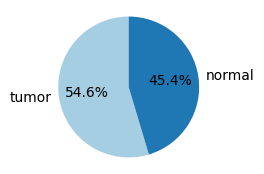

Sample Data:
|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) | 





In [6]:
# Visualize Data:
print("Full Dataset:",'\n')
view_df_summary_table(labels_df, "Data Summary")
view_df_summary_pie_chart(labels_df, "Pie Chart")
view_df_head(labels_df, "Sample Data")
print('\n')

## Split Data

In [7]:
# Define the paths to each folder

# Get all the image extensions 
# Possibly change to regular expression if needed 
image_extensions = ['*.jpeg', '*.jpg', '*.JPG', '*.png', '*.tif']


brain_tumor_dir = Path(DATA_DIRECTORY) / "Brain Tumor"
healthy_dir = Path(DATA_DIRECTORY) / "Healthy"
print(f"brain_tumor_dir = {brain_tumor_dir}\n")
print(f"healthy_dir = {healthy_dir}\n")


brain_tumor_images = []
healthy_brain_images = []

# Iterate over image extensions list and get all the images from the two folders
for ext in image_extensions: 
    brain_tumor_images.extend(brain_tumor_dir.glob(ext))  # Add all matching files to the list
    healthy_brain_images.extend(healthy_dir.glob(ext))  # Add all matching files to the list

# Verify that the images were collected proporly 
print(f"Number of Brain Tumor Images: {len(brain_tumor_images)}")
print(f"Number of Healthy Images: {len(healthy_brain_images)}")


# Split the data using train_test_split from sklearn 
brain_tumor_train, brain_tumor_test = train_test_split(brain_tumor_images, test_size=0.2, random_state=69)
healthy_train, healthy_test = train_test_split(healthy_brain_images, test_size=0.2, random_state=69)

# Combine both healthy and non healthy images into to training and testing 
train_images = brain_tumor_train + healthy_train 
test_images = brain_tumor_test + healthy_test
train_image_percentage = len(train_images)/(len(train_images) + len(test_images))
test_image_percentage = len(test_images)/(len(train_images) + len(test_images))

# Verify the number of images in training and testing sets as well as percentage with respect to all images in dataset
print(f"Number of Training Images: {len(train_images)}")
print(f"Number of Testing Images: {len(test_images)}")
print(f"Training set has: {train_image_percentage} % of the images")
print(f"Testing set has: {test_image_percentage} % of the images")




# New dataset path
#data_dir = '/kaggle/working/brain'
#data_dir = pathlib.Path(data_dir)

brain_tumor_dir = /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor

healthy_dir = /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy

Number of Brain Tumor Images: 2513
Number of Healthy Images: 2087
Number of Training Images: 3679
Number of Testing Images: 921
Training set has: 0.7997826086956522 % of the images
Testing set has: 0.20021739130434782 % of the images


## Process Data -> Torch / Tensorflow / etc

# Create Convolutional Neural Network